In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Cargar el dataset
df = pd.read_csv('uac_limpio.csv', sep=',')

# Visualiza las primeras filas del dataset para asegurarte que se cargó correctamente
df.head()

,ESCUELA,EDAD,SEXO,EST_CIVIL,HIJOS,TRABAJA_ESTUDIA,VIVE_SOLO,NIVEL_SOCIO_ECON,SEMESTRE,PPACumulado,PPAnterior
0,ADMINISTRACIÓN,20,1,0,0,0,0,2,4,14.128,14.389
1,ADMINISTRACIÓN,27,0,0,0,1,0,2,5,12.796,12.632
2,ADMINISTRACIÓN,22,0,0,0,1,1,1,10,14.906,15.381
3,ADMINISTRACIÓN,27,1,2,1,1,1,2,7,15.309,15.762
4,ADMINISTRACIÓN,31,0,0,0,1,1,2,10,14.581,13.000


In [4]:
# Separar las características (X) y el objetivo (y)
X = df[['EDAD','SEXO', 'EST_CIVIL', 'HIJOS', 'TRABAJA_ESTUDIA', 'VIVE_SOLO', 'NIVEL_SOCIO_ECON', 'SEMESTRE', 'PPAnterior']]
y = df['PPACumulado']

In [5]:
# Dividir los datos en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

LinearRegression()

In [6]:
# Predecir los valores de prueba
y_pred = modelo.predict(X_test)

In [7]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

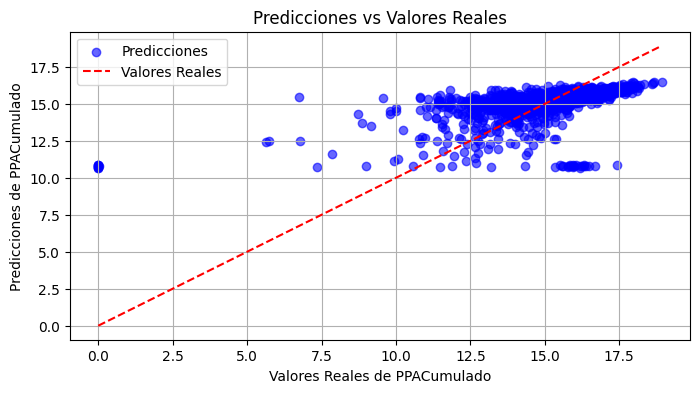

In [8]:
# Graficar las predicciones frente a los valores reales
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred, color='blue', label='Predicciones', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Valores Reales')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales de PPACumulado')
plt.ylabel('Predicciones de PPACumulado')
plt.legend()
plt.grid()
plt.show()

In [ ]:
"""""
# Graficar los resultados
# Histograma de errores
plt.figure(figsize=(10, 6))
error = y_test - y_pred
sns.histplot(error, bins=30, kde=True)
plt.xlabel('Error')
plt.title('Distribución de los Errores de Predicción')
plt.axvline(0, color='red', linestyle='--')  # Línea vertical en cero
plt.show()
"""""

In [9]:
# Resultados
print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)

Error Cuadrático Medio (MSE): 2.639833100150012
Coeficiente de determinación (R^2): 0.3232059711920875


El MSE es una medida de la calidad de un modelo de predicción. Representa la media de los errores cuadrados entre las predicciones del modelo y los valores reales.
En este caso, un MSE de aproximadamente 2.64 indica que, en promedio, el cuadrado de los errores de predicción del modelo es 2.64. Un valor más bajo de MSE generalmente indica un mejor ajuste del modelo.

In [10]:
# Mostrar los coeficientes del modelo
print("Coeficientes del modelo:", modelo.coef_)
print("Intercepto del modelo:", modelo.intercept_)

Coeficientes del modelo: [ 0.00283433  0.0554544   0.08653724 -0.04821879 -0.07741738 -0.05597471
 -0.00603636 -0.00249534  0.3007585 ]
Intercepto del modelo: 10.746814790478469


In [13]:
# Reemplaza estos valores con los que quieras predecir
nuevos_datos = np.array([[20, 0, 0, 0, 0, 0, 2, 10, 12.687]])  # Datos de ejemplo
prediccion = modelo.predict(nuevos_datos)
print("Predicción de PPACumulado:", prediccion)

Predicción de PPACumulado: [14.58219837]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


El modelo de regresión lineal tiene un MSE relativamente bajo, lo que puede indicar un error moderado en las predicciones. Sin embargo, el R2 sugiere que el modelo no explica bien la variabilidad de la variable dependiente, lo que puede implicar que se necesitan más variables, un modelo diferente o que los datos tengan variabilidad que no puede ser capturada adecuadamente.